# MNIST Case Study

## 3 approaches to solve this case study

1. Single layer Neural n/w to solve MNIST
2. Multi-layer Neural n/w to solve MNIST
3. CNN to solve MNIST

### Case3 - CNN


In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense


mnist = tf.keras.datasets.mnist

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [3]:
(features_train, labels_train),(features_test, labels_test) = mnist.load_data()

features_train, features_test = features_train / 255.0, features_test / 255.0

*It is not mandatory that every convolution layer be followed by max pooling layer, it can be skipped. U can skip max-pooling if u do not want feature reduction. Generally combination of convolution & max-pooling is what is generally used. Only initial convolution layer requires shape, subsequent conv layers doesn't require shape, it will automatically calculate* 

Conv2D layer where i am convolving on (28,28,1) image by passing 32, (3, 3) kernels. Then downsample it using a (2, 2) pool size.

### Feature Extraction

In [4]:
# Convolution layers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

2023-09-04 19:14:35.939330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Deep Neural N/w

Since we r already getting extracted features as input instead of raw data so we just use 1 hidden dense layer of 64 units, actually a shallow n/w and that too gives us a good accuracy.

In [5]:
# Fully connected layers
model.add(Flatten())  
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

*U had 86,700 parameters in MLP, here in CNN you have 32,874, reduction in features.*

In [8]:
features_train.shape, features_test.shape

((60000, 28, 28), (10000, 28, 28))

In case you work with greyscale ensure there is added channel dimension of 1, if u r using colored it will by default assume 3.

In [9]:
# Reshaping to format which CNN expects 
features_train = features_train.reshape(60000,28,28,1)
features_test = features_test.reshape(10000,28,28, 1)

In [10]:
model.fit(features_train, labels_train, epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2699 - accuracy: 0.9167 - val_loss: 0.0977 - val_accuracy: 0.9714
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0868 - accuracy: 0.9731 - val_loss: 0.0884 - val_accuracy: 0.9738
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0654 - accuracy: 0.9793 - val_loss: 0.0730 - val_accuracy: 0.9784
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0547 - val_accuracy: 0.9840
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0557 - val_accuracy: 0.9839


In [11]:
#Predictions on the test set

In [12]:
result = model.predict(features_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
result.shape

(10000, 10)

In [14]:
result[100].argmax() == labels_test[100]

True

In [15]:
result[1500].argmax() == labels_test[1500]

True

In [16]:
model.evaluate(features_test, labels_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9830


[0.055455029010772705, 0.9829999804496765]

In [17]:
#Inference

In [18]:
myindex=10

In [19]:
test_image=features_test[myindex]

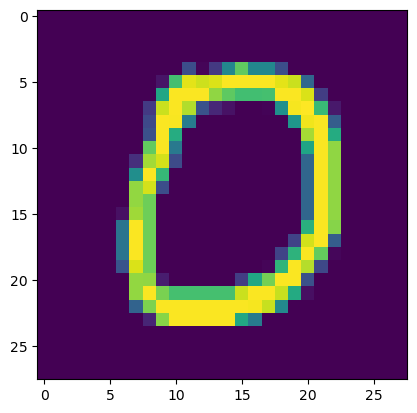

In [20]:
plt.imshow(test_image);

In [21]:
test_image = image.img_to_array(test_image)

In [22]:
#Predict expects a batch of images...we add a dummy dimension
test_image = test_image.reshape(1,28,28,1)


In [23]:
result = model.predict(test_image)

1/1 [==============================] - 0s 13ms/step


In [24]:
result

array([[9.9986434e-01, 3.8707505e-08, 2.2098930e-05, 8.1239246e-09,
        3.6385366e-08, 1.8799374e-06, 7.4494205e-06, 8.3782179e-05,
        2.1573011e-07, 2.0156891e-05]], dtype=float32)

In [25]:
result.argmax()

0

## Testing any random image

*<font color=blue>Note - To test any random image u need to make sure that image is preprocessed in same way like the images used for training. e.g. here we need greyscale as well as size (28,28) for the test image.*

In [26]:
pwd

'/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures'

You have used keras instead of openCV to load image.

In [27]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures/data/0.jpg')


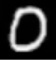

In [28]:
test_image

In [29]:
# Convert image to array

test_img = image.img_to_array(test_image)
test_img

array([[[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.],
        ...,
        [72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]]

In [30]:
test_img.shape

(60, 56, 3)

In [31]:
# Change to greyscale

import cv2

gray_image = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_image

array([[ 2.,  2.,  1., ...,  0.,  0.,  0.],
       [ 2.,  2.,  1., ...,  0.,  0.,  0.],
       [ 2.,  2.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [72., 72., 72., ..., 72., 72., 72.]], dtype=float32)

In [32]:
# resize image

resized_image = cv2.resize(gray_image, (28, 28))
resized_image.shape

(28, 28)

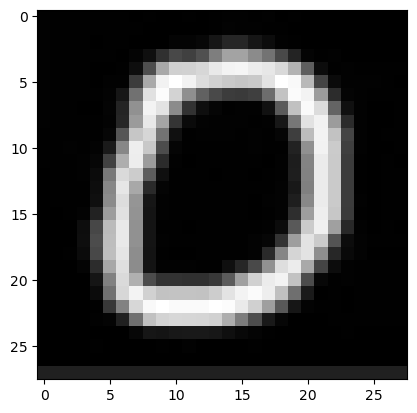

In [33]:
plt.imshow(resized_image, cmap='gray');

### Note: Predict expects a batch of images so we add a dummy dimension

In [34]:
gray_test_image = resized_image.reshape(1,28,28,1)

In [35]:
pred1 = model.predict(gray_test_image)

1/1 [==============================] - 0s 12ms/step


In [36]:
pred1

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
pred1.argmax()

0

### Check another random image

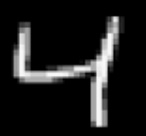

In [38]:
test_image = image.load_img('/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures/data/4.jpg')
test_image

In [39]:
test_img = image.img_to_array(test_image)
test_img.shape

(136, 146, 3)

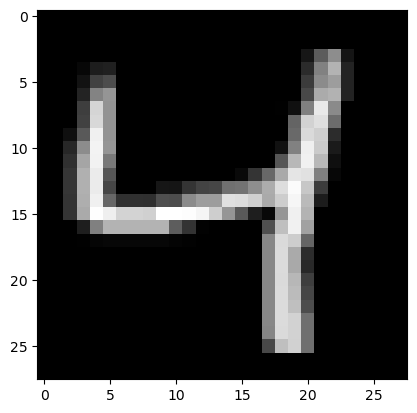

In [40]:
gray_image = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)   # convert to greyscale
resized_image = cv2.resize(gray_image, (28, 28))          # resize image

plt.imshow(resized_image, cmap='gray');

In [41]:
resized_image.shape

(28, 28)

In [42]:
gray_test_image = resized_image.reshape(1,28,28,1)
pred1 = model.predict(gray_test_image)
pred1

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
pred1.argmax()

4

### Note

When you load the image instead of doing seperate steps of converting to greyscale and resizing u can directly do that in 1 line while loading the image.

In [44]:
test_img = image.load_img('/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures/data/4.jpg', color_mode='grayscale',
                         target_size=(28,28))

In [45]:
test_img.size

(28, 28)

Then u can convert to array and apply the model and get predictions. U can also create a user-defined function for all this steps that will take in image and give o/p as label.